# PROJETO DE MESTRADO

### Índice:
- #### 0. Preparando o ambiente
- #### 1. Carregando os Dados
- #### 2. Análise, tratamento e limpeza dos dados
- #### 3. Gerando o Perfil/Descrição dos Dados
- #### 4. Juntando as tabelas Alertas e Locais
- #### 5. Plotando os pontos no mapa
- #### 6. Preparando os dados para Criação e Treinamento do modelo
- #### 7. Criação e treinamento do modelo
- #### 8. Realizando previsões
- #### 9. Visualizando e analisando as previsões
- #### 10. Comparando acurácia das previsões
- #### 11. Registro de resultados

## 0. Preparando o ambiente

In [1]:
# Atualizando o pip
#!python.exe -m pip install --upgrade pip

In [2]:
#!pip install --upgrade pip
#!pip install --upgrade setuptools



### 0.1. Instalando e atualizando bibliotecas

In [3]:
#!pip install pydantic-settings

In [4]:
#!pip install --upgrade pydantic-settings

In [5]:
#from pydantic_settings import BaseSettings

In [6]:
# via terminal
# pip install --upgrade jupyterlab ipywidgets
# jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [7]:
#import ipywidgets as widgets
#widgets.IntSlider()

In [8]:
#from ipywidgets import interact

In [9]:
#!pip install pandas_profiling

In [10]:
# Para ler arquivo xlsx (MS Excel) pelo Pandas DataFrame
#!pip install openpyxl

In [11]:
# Para geração de perfil de dados
#!pip install dtale

In [12]:
# para plotar os pontos geolocalizados no mapa
#!pip install folium

In [13]:
# Para instalar imagens como font
#!pip install fontawesome

In [14]:
#!pip install tensorflow

In [15]:
# Para conseguir importar funções de outros notebooks
#!pip install import-ipynb

In [16]:
#pip install pydot

In [17]:
# Para ver Mapas com Grids
#pip install contextily

In [18]:
#pip install pandas

In [19]:
#pip install pandas_profiling

In [20]:
##pip install numpy

In [21]:
#pip install openpyxl

In [22]:
#pip install folium

In [23]:
##pip install tensorflow

In [24]:
##pip install tensorflow-gpu
##!conda install tensorflow-gpu

In [25]:
##pip install keras-gpu

In [26]:
#pip install scikit-learn

In [27]:
#pip install matplotlib

In [28]:
#pip install graphviz

In [29]:
#pip install pydot

In [30]:
#!pip install dtale
#!conda install dtale

In [31]:
#!pip install fontawesome
#!conda install fontawesome

============

In [32]:
#!pip install --upgrade tensorflow
#import tensorflow as tf
#print(tf.__version__)

In [33]:
#!conda upgrade tensorflow

In [34]:
#!conda update -n base -c defaults conda

In [35]:
#!pip install keras

In [36]:
#!pip install --upgrade numpy
#!pip install numpy==1.19

In [37]:
# pip install osmnx

### 0.2. Importando bibliotecas

In [38]:
import pandas as pd  # para gerar os DataFrames (tabelas)
from IPython.display import display  # para apresentar os dados no Notebook de forma mais agradável 
import dtale  # para gerar perfil dos dados (descrever os dados)
import folium  # para plotar os pontos geolocalizados no mapa
import fontawesome  # para utilizar imagens como font
#import tensorflow-gpu as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential  # tipo de modelo
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation, Input  #, DepthwiseConv1D, GlobalMaxPooling1D  # camadas utilizadas nos modelos
from sklearn.preprocessing import MinMaxScaler  # normalizador
import numpy as np  # séries de dados
import matplotlib.pyplot as plt  # para visualização dos dados em gráficos
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint  # funções para utilizar nos callbacks
# durante os treinamentos dos modelos.
from sklearn.model_selection import train_test_split  # para dividir os dados em treinamento e teste
from scipy.spatial.distance import cdist  # para cálculo da distância euclidiana
from keras.metrics import mean_absolute_error  # para cálculo do mean_absolute_error após ajustes das predições
from tensorflow.keras.optimizers import AdamW  # otimizador específico. AdamW optimization is a stochastic gradient descent method 
# that is based on adaptive estimation of first-order and second-order moments with an added method to decay weights
from tensorflow.keras.initializers import glorot_uniform  # método de inicialização Xavier ou Glorot. 
# A inicialização de Xavier é uma escolha comum para a inicialização de pesos, pois ajuda a evitar problemas de treinamento, 
# como gradientes que explodem ou desaparecem. Ela é especialmente útil em redes neurais profundas e redes recorrentes, 
# como as LSTMs. 
# Importando funções de outros notebooks


## 1. Carregando os Dados

### 1.1. Tabela Alertas

In [39]:
%%time
#import pandas as pd
#from IPython.display import display

# Carregar o arquivo CSV sem definir tipos para identificar problemas
df_alertas = pd.read_csv('Dados/SP/df_alertas_preprocessado.csv', delimiter=',', on_bad_lines='skip', low_memory=False, encoding='utf-8')

# Após identificar e corrigir problemas, redefinir os tipos de dados conforme necessário
df_alertas = df_alertas.astype({
    'EmpID': 'int64',
    'LocID': 'int64',
    'AleAleTipID': 'int32',
    'AleSisOcr': 'object',
    'AleAnoBO': 'str',  # 'int64'
    'AleMunBO': 'object',
    'AleNumBO': 'object',
    'AleUfBo': 'object',
    'AleNat': 'object'
})

# Obter um resumo informativo do DataFrame
print(df_alertas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985854 entries, 0 to 1985853
Data columns (total 13 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   EmpID        int64 
 2   DataHora     object
 3   LocID        int64 
 4   AleAleTipID  int32 
 5   AleSisOcr    object
 6   AleAnoBO     object
 7   AleDatOcr    object
 8   AleMunBO     object
 9   AleNumBO     object
 10  AleUfBo      object
 11  AleNat       object
 12  TempoDoBO    object
dtypes: int32(1), int64(3), object(9)
memory usage: 189.4+ MB
None
CPU times: total: 4.81 s
Wall time: 4.83 s


In [40]:
display(df_alertas)

,Unnamed: 0,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,AleNat,TempoDoBO
0,0,81982529,2022-08-12 13:58:04,13026,2,BIN ROUBO/FURTO,2022.0,2022-11-18 00:00:00.000,ARAQUARI,1765,SC,FURTADO,-98 days +13:58:04
1,1,77321415,2022-10-26 16:03:02,17139,2,BIN ROUBO/FURTO,2022.0,2022-10-17 00:00:00.000,SAO PAULO,1002989,SP,FURTADO,9 days 16:03:02
2,2,71174983,2022-05-14 19:48:20,19467,31,RENACH,2021.0,2021-12-11 00:00:00.000,NaN,RECSUSP BLOQUEIO 19/02/2019,SP,MOTORISTA COM CNH CASSADA OU SUSPENSA,154 days 19:48:20
3,3,109552801,2022-06-25 12:52:35,19477,31,RENACH,2022.0,2022-06-02 00:00:00.000,NaN,RECSUSP BLOQUEIO 01/07/2021,SP,MOTORISTA COM CNH CASSADA OU SUSPENSA,23 days 12:52:35
4,4,66983116,2023-04-23 15:09:23,15856,8,NaN,2022.0,2022-03-10 00:00:00.000,RIO DE JANEIRO,00271785420218190204,RJ,PESSOA PROCURADA,409 days 15:09:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985849,3506457,91221855,2022-01-01 13:07:14,16900,1,BIN ROUBO/FURTO,2021.0,2021-12-09 00:00:00.000,SAO PAULO,284569,SP,ROUBADO,23 days 13:07:14
1985850,3506458,91221855,2022-01-05 16:02:50,41322,1,BIN ROUBO/FURTO,2021.0,2021-12-09 00:00:00.000,SAO PAULO,284569,SP,ROUBADO,27 days 16:02:50
1985851,3506459,91221855,2022-01-05 16:08:53,41160,1,BIN ROUBO/FURTO,2021.0,2021-12-09 00:00:00.000,SAO PAULO,284569,SP,ROUBADO,27 days 16:08:53
1985852,3506460,91221855,2022-01-05 15:31:18,39481,1,BIN ROUBO/FURTO,2021.0,2021-12-09 00:00:00.000,SAO PAULO,284569,SP,ROUBADO,27 days 15:31:18


In [41]:
display(set(df_alertas['AleNat']))

{'ACAO CRIMINOSA',
 'APREENDIDO',
 'CASSACAO CNH (ARTIGO 263 E RESOLUCAO 182)',
 'CLONADO',
 'CONJUGE FORAGIDO',
 'CONJUGE PROCURADO',
 'DELITO DE TRANSITO – RESOLUCAO 300',
 'DESAPARECIMENTO',
 'FURTADO',
 'FURTO 190',
 'IMPEDIDO DE SER HABILITADO (292 A 294)',
 'LOC AUX CORTEX E SIST INTEGRADOS',
 'LOCALIZADO',
 'MEDIDA ADMINISTRATIVA',
 'MOTORISTA COM CNH CASSADA OU SUSPENSA',
 'PESSOA PROCURADA',
 'PROPRIETARIO DE EMPRESA FORAGIDO',
 'PROPRIETARIO DE EMPRESA PROCURADO',
 'PROPRIETARIO FORAGIDO',
 'PROPRIETARIO PROCURADO',
 'ROUBADO',
 'ROUBO 190',
 'SEQUESTRO',
 nan}

### 1.2. Tabela Locais

In [42]:
%%time
#import pandas as pd

# Definir uma função para converter valores numéricos com vírgula para ponto
def convert_to_float(value):
    return float(value.replace(',', '.'))
    
dtypes = {
    'LocID': 'int64',
    'LocNomLocMJSP': 'object',
    'LocGeog': 'object',
    'LocAtv': 'int32',
    'EmpID': 'int64',
    'LocLat': 'float64',
    'LocLong': 'float64',    
    'LocMunGeoId': 'int32',
    'MunGeoNom': 'object',
    'UFGeoSgl': 'object'
}
# Ler o arquivo CSV em um DataFrame
df_locais = pd.read_csv('Dados/SP/df_locais_plus_ox-Completo.csv', delimiter=',', converters={ #, dtype=dtypes,
    'LocLat': convert_to_float,
    'LocLong': convert_to_float
})


# Exibir o DataFrame locais
#display(df_locais.shape)
# Obter um resumo informativo do DataFrame
print(df_locais.info())

display(df_locais)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12300 entries, 0 to 12299
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12300 non-null  int64  
 1   LocID                          12300 non-null  int64  
 2   LocNomLocMJSP                  12300 non-null  object 
 3   LocGeog                        12300 non-null  object 
 4   LocAtv                         12300 non-null  int64  
 5   EmpID                          12300 non-null  int64  
 6   LocLat                         12300 non-null  float64
 7   LocLong                        12300 non-null  float64
 8   LocMunGeoId                    12300 non-null  int64  
 9   MunGeoNom                      12300 non-null  object 
 10  UFGeoSgl                       12300 non-null  object 
 11  nearest_node                   12300 non-null  int64  
 12  nearest_edge_1                 12300 non-null 

,Unnamed: 0,LocID,LocNomLocMJSP,LocGeog,LocAtv,EmpID,LocLat,LocLong,LocMunGeoId,MunGeoNom,...,nearest_node,nearest_edge_1,nearest_edge_2,edge_key,street_type_crossing,street_type_mini_roundabout,street_type_motorway_junction,street_type_traffic_signals,street_type_turning_circle,street_type_unknown
0,0,11575,SP - CAMPINAS - HEITOR PENTEADO - SENT RODOVIA...,0xE6100000010C5A457F68E6E536C088F4DBD7818147C0,1,4,-22.898047,-47.011775,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,11576,SP - CAMPINAS - HEITOR PENTEADO - SENT RODOVIA...,0xE6100000010C5A457F68E6E536C088F4DBD7818147C0,1,4,-22.898047,-47.011775,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,11577,SP - CAMPINAS - HEITOR PENTEADO - SENT CENTRO ...,0xE6100000010C5A457F68E6E536C088F4DBD7818147C0,1,4,-22.898047,-47.011775,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,11578,SP - CAMPINAS - HEITOR PENTEADO - SENT CENTRO ...,0xE6100000010C5A457F68E6E536C088F4DBD7818147C0,1,4,-22.898047,-47.011775,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,11579,SP - CAMPINAS - LIX DA CUNHA / SAIDA - SENT SE...,0xE6100000010C3D49BA66F2E536C0FCA5457D928D47C0,1,4,-22.898230,-47.106033,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,14072,59875,SP - POTIRENDABA - ROD ABEL PINHO MAIA - ACESS...,0xE6100000010C94F6065F980C35C01FF46C567DAE48C0,1,106,-21.049200,-49.363200,4919,POTIRENDABA,...,4086913516,2841136302,4086913516,0,0.0,0.0,0.0,0.0,0.0,1.0
12296,14073,59876,SP - POTIRENDABA - R. SENADOR BARROS PENTEADO ...,0xE6100000010C295C8FC2F50835C09BE61DA7E8B048C0,1,106,-21.035000,-49.382100,4919,POTIRENDABA,...,4086913516,2841136302,4086913516,0,0.0,0.0,0.0,0.0,0.0,1.0
12297,14074,59877,SP - ZACARIAS - AV. 12 DE MAIO - ACESSO BURITA...,0xE6100000010C3CBD5296210E35C0C898BB96900749C0,1,106,-21.055200,-50.059100,733,ZACARIAS,...,4086913516,2841136302,4086913516,0,0.0,0.0,0.0,0.0,0.0,1.0
12298,14076,59879,"SP - ITAJOBI - AV PADRE OSMAR TICIANELLI, N 12...",0xE6100000010CE3361AC05B5035C0CA32C4B12E8648C0,1,106,-21.313900,-49.048300,526,ITAJOBI,...,4086913516,2841136302,4086913516,0,0.0,0.0,0.0,0.0,0.0,1.0


CPU times: total: 46.9 ms
Wall time: 49 ms


In [43]:
print(len(set(df_locais['MunGeoNom'])))
set(df_locais['MunGeoNom'])

271


{'AGUAS DA PRATA',
 'AGUAS DE LINDOIA',
 'AGUDOS',
 'ALTINOPOLIS',
 'ALUMINIO',
 'AMERICANA',
 'AMERICO BRASILIENSE',
 'AMPARO',
 'ANALANDIA',
 'ANGATUBA',
 'ANHEMBI',
 'APARECIDA',
 'APIAI',
 'ARACARIGUAMA',
 'ARACOIABA DA SERRA',
 'ARARAQUARA',
 'ARARAS',
 'AREIOPOLIS',
 'ARIRANHA',
 'ARTUR NOGUEIRA',
 'ARUJA',
 'ATIBAIA',
 'AVAI',
 'AVARE',
 'BANANAL',
 'BARBOSA',
 'BARIRI',
 'BARRA BONITA',
 'BARUERI',
 'BAURU',
 'BERTIOGA',
 'BIRITIBA-MIRIM',
 'BOA ESPERANCA DO SUL',
 'BOITUVA',
 'BORACEIA',
 'BORBOREMA',
 'BOTUCATU',
 'BRAGANCA PAULISTA',
 'BRODOWSKI',
 'BROTAS',
 'BURITAMA',
 'CABRALIA PAULISTA',
 'CABREUVA',
 'CACAPAVA',
 'CACHOEIRA PAULISTA',
 'CAIEIRAS',
 'CAJAMAR',
 'CAJURU',
 'CAMPINAS',
 'CAMPO LIMPO PAULISTA',
 'CAMPOS DO JORDAO',
 'CANAS',
 'CAPAO BONITO',
 'CAPELA DO ALTO',
 'CAPIVARI',
 'CARAGUATATUBA',
 'CARAPICUIBA',
 'CASA BRANCA',
 'CATANDUVA',
 'CATIGUA',
 'CESARIO LANGE',
 'CHAVANTES',
 'CONCHAS',
 'CORUMBATAI',
 'COSMOPOLIS',
 'COTIA',
 'CRUZEIRO',
 'CUBATAO',
 

In [44]:
df_locais['MunGeoNom'].value_counts()

MunGeoNom
SAO PAULO                   3386
SAO JOSE DOS CAMPOS          454
SOROCABA                     417
OSASCO                       370
SANTOS                       347
                            ... 
TAQUARITINGA                   1
SANTO ANTONIO DA ALEGRIA       1
JARDINOPOLIS                   1
UBARANA                        1
ARIRANHA                       1
Name: count, Length: 271, dtype: int64

## 2. Análise, tratamento e limpeza dos dados
### Processo iterativo que é refinado a cada fase

### 2.1. Tabela Alertas

#### 2.1.1. Limpeza / Deduplicação

#### Enriquecimento dos Dados / Engenharia de Recursos

In [45]:
print(len(df_alertas))
df_alertas = df_alertas[~df_alertas['AleDatOcr'].isnull()]
print(len(df_alertas))

1985854
1985835


In [46]:
# Criar um novo campo com os dados da diferença de tempo entre a criação do BO e o momento do Alerta que o veículo passa pela câmera (sensor externo)
df_alertas['DataHora'] = pd.to_datetime(df_alertas['DataHora'])
df_alertas['AleDatOcr'] = pd.to_datetime(df_alertas['AleDatOcr']) 
df_alertas['TempoDoBO'] = df_alertas['DataHora'] - df_alertas['AleDatOcr']

#### 2.1.2. Verificação de valores Nulos e Brancos

### 2.2. Tabela Locais

#### 2.2.1. Limpeza / Deduplicação

In [47]:
# Remover locais que não possuem localização geográfica.
registros_totais = len(df_locais)
df_locais = df_locais.drop_duplicates()
print("\n*Dos " + str(registros_totais) + " registros totais iniciais, após a deduplicação, ficaram apenas " + str(len(df_locais)) + " registros únicos.\n")

df_locais = df_locais[df_locais['LocLat'] != 0]
print("**Dos registros deduplicados, após a seleção apenas dos Locais com LocLat != 0, ficaram apenas " + str(len(df_locais)) + " registros únicos.")
df_locais = df_locais[df_locais['LocLong'] != 0]
print("**Dos registros com LocLat != 0, após a seleção apenas dos Locais com LocLong != 0, ficaram apenas " + str(len(df_locais)) + " registros únicos.\n")
df_locais = df_locais[df_locais['LocAtv'] != 0]
print("***Dos registros com LocLong != 0, após a seleção apenas dos Locais com LocAtv != 0, ficaram apenas " + str(len(df_locais)) + " registros únicos.\n")
# LocAtv == 0 está duplicado com LocAtv == 1 para as informações relevantes.

#display(df_locais)


*Dos 12300 registros totais iniciais, após a deduplicação, ficaram apenas 12300 registros únicos.

**Dos registros deduplicados, após a seleção apenas dos Locais com LocLat != 0, ficaram apenas 12300 registros únicos.
**Dos registros com LocLat != 0, após a seleção apenas dos Locais com LocLong != 0, ficaram apenas 12300 registros únicos.

***Dos registros com LocLong != 0, após a seleção apenas dos Locais com LocAtv != 0, ficaram apenas 12300 registros únicos.



In [48]:
print(df_locais.describe())

         Unnamed: 0         LocID   LocAtv         EmpID        LocLat  \
count  12300.000000  12300.000000  12300.0  12300.000000  12300.000000   
mean    7161.825691  27863.129512      1.0     12.353577    -23.301265   
std     4050.920041  14647.694035      0.0     18.564780      0.538685   
min        0.000000  11575.000000      1.0      1.000000    -24.780390   
25%     3631.750000  16562.750000      1.0      9.000000    -23.595096   
50%     7059.500000  20020.500000      1.0      9.000000    -23.497400   
75%    10674.250000  40048.750000      1.0      9.000000    -23.057900   
max    14077.000000  59880.000000      1.0    106.000000    -21.014910   

            LocLong   LocMunGeoId  nearest_node  nearest_edge_1  \
count  12300.000000  12300.000000  1.230000e+04    1.230000e+04   
mean     -46.815245   3758.181220  2.887533e+09    2.852378e+09   
std        0.771750   1844.142144  2.348453e+09    2.395604e+09   
min      -50.229451     87.000000  5.974470e+05    5.736440e+05  

#### 2.2.2. Enriquecimento dos Dados / Engenharia de Recursos - df_locais

In [49]:
# Definir o número desejado de casas decimais
num_decimals = 14

# Formatar os valores resultantes
df_locais = np.round(df_locais, num_decimals)

df_locais.sort_values(by='LocID', inplace=True)

display(df_locais)

,Unnamed: 0,LocID,LocNomLocMJSP,LocGeog,LocAtv,EmpID,LocLat,LocLong,LocMunGeoId,MunGeoNom,...,nearest_node,nearest_edge_1,nearest_edge_2,edge_key,street_type_crossing,street_type_mini_roundabout,street_type_motorway_junction,street_type_traffic_signals,street_type_turning_circle,street_type_unknown
0,0,11575,SP - CAMPINAS - HEITOR PENTEADO - SENT RODOVIA...,0xE6100000010C5A457F68E6E536C088F4DBD7818147C0,1,4,-22.898047,-47.011775,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,11576,SP - CAMPINAS - HEITOR PENTEADO - SENT RODOVIA...,0xE6100000010C5A457F68E6E536C088F4DBD7818147C0,1,4,-22.898047,-47.011775,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,11577,SP - CAMPINAS - HEITOR PENTEADO - SENT CENTRO ...,0xE6100000010C5A457F68E6E536C088F4DBD7818147C0,1,4,-22.898047,-47.011775,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,11578,SP - CAMPINAS - HEITOR PENTEADO - SENT CENTRO ...,0xE6100000010C5A457F68E6E536C088F4DBD7818147C0,1,4,-22.898047,-47.011775,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,11579,SP - CAMPINAS - LIX DA CUNHA / SAIDA - SENT SE...,0xE6100000010C3D49BA66F2E536C0FCA5457D928D47C0,1,4,-22.898230,-47.106033,4198,CAMPINAS,...,1102331648,1102331648,582557,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,14072,59875,SP - POTIRENDABA - ROD ABEL PINHO MAIA - ACESS...,0xE6100000010C94F6065F980C35C01FF46C567DAE48C0,1,106,-21.049200,-49.363200,4919,POTIRENDABA,...,4086913516,2841136302,4086913516,0,0.0,0.0,0.0,0.0,0.0,1.0
12296,14073,59876,SP - POTIRENDABA - R. SENADOR BARROS PENTEADO ...,0xE6100000010C295C8FC2F50835C09BE61DA7E8B048C0,1,106,-21.035000,-49.382100,4919,POTIRENDABA,...,4086913516,2841136302,4086913516,0,0.0,0.0,0.0,0.0,0.0,1.0
12297,14074,59877,SP - ZACARIAS - AV. 12 DE MAIO - ACESSO BURITA...,0xE6100000010C3CBD5296210E35C0C898BB96900749C0,1,106,-21.055200,-50.059100,733,ZACARIAS,...,4086913516,2841136302,4086913516,0,0.0,0.0,0.0,0.0,0.0,1.0
12298,14076,59879,"SP - ITAJOBI - AV PADRE OSMAR TICIANELLI, N 12...",0xE6100000010CE3361AC05B5035C0CA32C4B12E8648C0,1,106,-21.313900,-49.048300,526,ITAJOBI,...,4086913516,2841136302,4086913516,0,0.0,0.0,0.0,0.0,0.0,1.0


- ## Filtro Radares

### 2.2.7. Calculando a Distância Euclidiana entre os Sensores Externos (Radares) e Filtrando por Radares mais próximos

### 2.2.8. Por Distância entre os Radares

In [50]:
# Função para calcular distância euclidiana
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Inicializar a nova coluna com zeros ou NaNs
df_locais['Distancia_Eucl'] = np.nan

change = 0
while change != len(df_locais):

    change = len(df_locais)
    df_locais = df_locais.sort_values(by=['LocID'])
    
    # Criar colunas deslocadas (shifted) para a latitude e longitude anteriores
    df_locais['LocLat_prev'] = df_locais['LocLat'].shift(1)
    df_locais['LocLong_prev'] = df_locais['LocLong'].shift(1)

    df_locais = df_locais.sort_values(by=['LocID'])
    
    # Calcular a distância euclidiana, ignorando a primeira linha (que terá NaNs)
    df_locais['Distancia_Eucl'] = euclidean_distance(
        df_locais['LocLat_prev'],
        df_locais['LocLong_prev'],
        df_locais['LocLat'],
        df_locais['LocLong']
    )
    df_locais['Distancia_Eucl'] = df_locais['Distancia_Eucl'].fillna(0)

    #df_locais = df_locais[df_locais['Distancia_Eucl'] < 1.0]  # 0.5  ## Não aplicado

# Remover as colunas temporárias usadas para o cálculo
df_locais.drop(columns=['LocLat_prev', 'LocLong_prev'], inplace=True)
# Exibir o DataFrame resultante

#Para 200 km: 1.8°
#Para 150 km: 1.35°
#Para 111 km: 1.0°
#Para 50 km: 0.45°
#Para 30 km: 0.27°
#Para 15 km: 0.14°
#Para 10 km: 0.09°
#Para 5 km: 0.045°
#Para 1 km: 0.009°
#Para 0.1 km (100 metros): 0.0009°
#Para 0.01 km (10 metros): 0.00009°

display(df_locais.sort_values(by='Distancia_Eucl')[['LocID', 'LocLat', 'LocLong', 'Distancia_Eucl']])
#display(df_locais.sort_values(by='Distancia_Eucl'))

,LocID,LocLat,LocLong,Distancia_Eucl
0,11575,-22.898047,-47.011775,0.000000
6647,23337,-23.948700,-46.336600,0.000000
6646,23336,-23.948700,-46.336600,0.000000
6644,23334,-23.948300,-46.336900,0.000000
6642,23332,-23.949800,-46.366300,0.000000
...,...,...,...,...
9579,40935,-22.920200,-45.441600,4.571073
6556,23236,-23.327792,-45.584522,4.578085
4691,18377,-21.117559,-50.213123,4.605127
8853,39357,-23.163900,-48.950600,4.620789


#### 2.2.10. Verificação de valores Nulos e Brancos

## 3. Gerando o Perfil/Descrição dos Dados

### 3.1. Tabela Alertas

In [51]:
#import dtale
# http://gus-dell-prata:40000/dtale/popup/describe/1
# Crie um relatório do DataFrame
#dtale.show(df_alertas)

### 3.2. Tabela Locais

In [52]:
#import dtale
# http://gus-dell-prata:40000/dtale/popup/describe/2
# Crie um relatório do DataFrame
#dtale.show(df_locais)

## 4. Juntando as tabelas Alertas e Locais

In [53]:
print(min(df_alertas['LocID']))
print(max(df_alertas['LocID']))
print(min(df_locais['LocID']))
print(max(df_locais['LocID']))

11575
59771
11575
59880


## 4.1. Filtro TempoDoBO

In [54]:
# retirar passagens existentes antes da abertura formal do B.O.
print(len(df_alertas))
df_alertas = df_alertas[df_alertas['TempoDoBO'] > pd.Timedelta(seconds=0)]
print(len(df_alertas))
# Exibir informações sobre o DataFrame resultante
#print(df_alertas.info())


1985835
1973581


In [55]:
print(len(df_alertas))
# Filtrar df_alertas para encontrar LocID que não estão em df_locais
#filtro = ~df_alertas['LocID'].isin(df_locais['LocID'])
result = df_alertas[~df_alertas['LocID'].isin(df_locais['LocID'])]

# Extrair os EmpID dos registros onde LocID não está em df_locais
emp_ids_to_exclude = result['EmpID'].unique()
print("Quantidade de EmpID com LocID que não existe na tabela df_locais:")
print(len(emp_ids_to_exclude))

# Excluir registros de df_alertas onde EmpID está na lista emp_ids_to_exclude
df_alertas = df_alertas[~df_alertas['EmpID'].isin(emp_ids_to_exclude)]
df_alertas


1973581
Quantidade de EmpID com LocID que não existe na tabela df_locais:
18465


,Unnamed: 0,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,AleUfBo,AleNat,TempoDoBO
1,1,77321415,2022-10-26 16:03:02,17139,2,BIN ROUBO/FURTO,2022.0,2022-10-17,SAO PAULO,1002989,SP,FURTADO,9 days 16:03:02
2,2,71174983,2022-05-14 19:48:20,19467,31,RENACH,2021.0,2021-12-11,NaN,RECSUSP BLOQUEIO 19/02/2019,SP,MOTORISTA COM CNH CASSADA OU SUSPENSA,154 days 19:48:20
3,3,109552801,2022-06-25 12:52:35,19477,31,RENACH,2022.0,2022-06-02,NaN,RECSUSP BLOQUEIO 01/07/2021,SP,MOTORISTA COM CNH CASSADA OU SUSPENSA,23 days 12:52:35
4,4,66983116,2023-04-23 15:09:23,15856,8,NaN,2022.0,2022-03-10,RIO DE JANEIRO,00271785420218190204,RJ,PESSOA PROCURADA,409 days 15:09:23
5,5,35750433,2022-06-17 11:32:06,16402,31,RENACH,2021.0,2021-12-16,NaN,RECSUSP BLOQUEIO 27/02/2020,SP,MOTORISTA COM CNH CASSADA OU SUSPENSA,183 days 11:32:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985849,3506457,91221855,2022-01-01 13:07:14,16900,1,BIN ROUBO/FURTO,2021.0,2021-12-09,SAO PAULO,284569,SP,ROUBADO,23 days 13:07:14
1985850,3506458,91221855,2022-01-05 16:02:50,41322,1,BIN ROUBO/FURTO,2021.0,2021-12-09,SAO PAULO,284569,SP,ROUBADO,27 days 16:02:50
1985851,3506459,91221855,2022-01-05 16:08:53,41160,1,BIN ROUBO/FURTO,2021.0,2021-12-09,SAO PAULO,284569,SP,ROUBADO,27 days 16:08:53
1985852,3506460,91221855,2022-01-05 15:31:18,39481,1,BIN ROUBO/FURTO,2021.0,2021-12-09,SAO PAULO,284569,SP,ROUBADO,27 days 15:31:18


In [56]:
df_all = df_alertas.merge(df_locais, on='LocID', how='inner')
df_all = df_all.rename(columns={"EmpID_x": "EmpID", "EmpID_y": "EmpresaID"})
print(len(df_all))

1295250


In [57]:
df_all.groupby('MunGeoNom')['LocID'].count().reset_index()


,MunGeoNom,LocID
0,AGUAS DA PRATA,73
1,AGUAS DE LINDOIA,4870
2,ALTINOPOLIS,70
3,AMERICANA,4832
4,AMPARO,145
...,...,...
145,VALINHOS,4634
146,VARZEA PAULISTA,369
147,VERA CRUZ,10
148,VOTORANTIM,303


In [58]:
df_all['MunGeoNom'].value_counts().reset_index()


,MunGeoNom,count
0,SAO PAULO,570916
1,MAIRIPORA,102660
2,SAO BERNARDO DO CAMPO,66940
3,OSASCO,38897
4,CUBATAO,32073
...,...,...
145,ITARIRI,11
146,VERA CRUZ,10
147,GUARIBA,5
148,FARTURA,3


In [59]:
df_all[['MunGeoNom','LocID']].value_counts()

MunGeoNom            LocID
MAIRIPORA            40098    17616
                     40094    12741
                     40095    12236
CUBATAO              17756    11583
MAIRIPORA            40083     9784
                              ...  
SAO JOSE DOS CAMPOS  43875        1
                     43874        1
SUMARE               58394        1
HORTOLANDIA          46102        1
SAO JOSE DOS CAMPOS  43878        1
Name: count, Length: 7570, dtype: int64

In [60]:
df_all['MunGeoNom'].value_counts()

MunGeoNom
SAO PAULO                570916
MAIRIPORA                102660
SAO BERNARDO DO CAMPO     66940
OSASCO                    38897
CUBATAO                   32073
                          ...  
ITARIRI                      11
VERA CRUZ                    10
GUARIBA                       5
FARTURA                       3
ITARARE                       1
Name: count, Length: 150, dtype: int64

In [61]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295250 entries, 0 to 1295249
Data columns (total 34 columns):
 #   Column                         Non-Null Count    Dtype          
---  ------                         --------------    -----          
 0   Unnamed: 0_x                   1295250 non-null  int64          
 1   EmpID                          1295250 non-null  int64          
 2   DataHora                       1295250 non-null  datetime64[ns] 
 3   LocID                          1295250 non-null  int64          
 4   AleAleTipID                    1295250 non-null  int32          
 5   AleSisOcr                      1282317 non-null  object         
 6   AleAnoBO                       1295250 non-null  object         
 7   AleDatOcr                      1295250 non-null  datetime64[ns] 
 8   AleMunBO                       1057505 non-null  object         
 9   AleNumBO                       1243742 non-null  object         
 10  AleUfBo                        1295217 non

## 4.2. Web Mercator (EPSG) e UTM - Formas de representação de Geolocalização

In [62]:
#import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Suponha que você tenha um DataFrame pandas com latitude e longitude
# Exemplo: df = pd.DataFrame({'LocLat': [-23.5505, -23.5489], 'LocLong': [-46.6333, -46.6340]})

# Crie uma coluna de geometria a partir das coordenadas de latitude e longitude
geometry = [Point(xy) for xy in zip(df_all['LocLong'], df_all['LocLat'])]
geo_df = gpd.GeoDataFrame(df_all, geometry=geometry)

# Defina o sistema de coordenadas (WGS 84 - EPSG:4326)
geo_df.crs = 'epsg:4326'

# Converta para o sistema de coordenadas projetado (EPSG:3857)
geo_df_epsg = geo_df.to_crs(epsg=3857)

# Extraia as coordenadas em metros para EPSG:3857
df_all['LocLong_EPSG_X'] = geo_df_epsg.geometry.x
df_all['LocLat_EPSG_Y'] = geo_df_epsg.geometry.y

# Converta para o sistema de coordenadas UTM para a zona 23S (EPSG:32723)
geo_df_utm = geo_df.to_crs(epsg=32723)

# Extraia as coordenadas em metros para UTM (EPSG:32723)
df_all['LocLong_UTM_X'] = geo_df_utm.geometry.x
df_all['LocLat_UTM_Y'] = geo_df_utm.geometry.y

# Visualize o DataFrame com as novas colunas
display(df_all.head(3))


,Unnamed: 0_x,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,...,street_type_mini_roundabout,street_type_motorway_junction,street_type_traffic_signals,street_type_turning_circle,street_type_unknown,Distancia_Eucl,LocLong_EPSG_X,LocLat_EPSG_Y,LocLong_UTM_X,LocLat_UTM_Y
0,1,77321415,2022-10-26 16:03:02,17139,2,BIN ROUBO/FURTO,2022.0,2022-10-17,SAO PAULO,1002989,...,0.0,0.0,1.0,0.0,0.0,0.000000,-5.193188e+06,-2.695403e+06,331425.575288,7.397602e+06
1,2,71174983,2022-05-14 19:48:20,19467,31,RENACH,2021.0,2021-12-11,NaN,RECSUSP BLOQUEIO 19/02/2019,...,0.0,0.0,0.0,0.0,1.0,0.083785,-5.165775e+06,-2.735388e+06,356928.681856,7.361446e+06
2,3,109552801,2022-06-25 12:52:35,19477,31,RENACH,2022.0,2022-06-02,NaN,RECSUSP BLOQUEIO 01/07/2021,...,0.0,0.0,0.0,0.0,1.0,0.000000,-5.188711e+06,-2.714650e+06,335729.730771,7.380103e+06


In [63]:
display(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295250 entries, 0 to 1295249
Data columns (total 38 columns):
 #   Column                         Non-Null Count    Dtype          
---  ------                         --------------    -----          
 0   Unnamed: 0_x                   1295250 non-null  int64          
 1   EmpID                          1295250 non-null  int64          
 2   DataHora                       1295250 non-null  datetime64[ns] 
 3   LocID                          1295250 non-null  int64          
 4   AleAleTipID                    1295250 non-null  int32          
 5   AleSisOcr                      1282317 non-null  object         
 6   AleAnoBO                       1295250 non-null  object         
 7   AleDatOcr                      1295250 non-null  datetime64[ns] 
 8   AleMunBO                       1057505 non-null  object         
 9   AleNumBO                       1243742 non-null  object         
 10  AleUfBo                        1295217 non

None

#### 4.2.1. Web Mercator (EPSG)

#### **** Descomentar a célula abaixo para utilizar a representação geográfica de Web Mercator (em alguns trechos aqui também sendo referenciada como EPSG)

In [64]:
# Web Mercator (EPSG)
'''
# Renomear as colunas 'LocLat' e 'LocLong' para 'LocLat_orig' e 'LocLong_orig'
df_all = df_all.rename(columns={'LocLat': 'LocLat_orig', 'LocLong': 'LocLong_orig'})

# Renomear as colunas 'LocLat_EPSG_Y' e 'LocLong_EPSG_X' para 'LocLat' e 'LocLong'
df_all = df_all.rename(columns={'LocLat_EPSG_Y': 'LocLat', 'LocLong_EPSG_X': 'LocLong'})

# Visualizar as primeiras linhas para verificar as mudanças
print(df_all.head())
'''

"\n# Renomear as colunas 'LocLat' e 'LocLong' para 'LocLat_orig' e 'LocLong_orig'\ndf_all = df_all.rename(columns={'LocLat': 'LocLat_orig', 'LocLong': 'LocLong_orig'})\n\n# Renomear as colunas 'LocLat_EPSG_Y' e 'LocLong_EPSG_X' para 'LocLat' e 'LocLong'\ndf_all = df_all.rename(columns={'LocLat_EPSG_Y': 'LocLat', 'LocLong_EPSG_X': 'LocLong'})\n\n# Visualizar as primeiras linhas para verificar as mudanças\nprint(df_all.head())\n"

#### 4.2.2. UTM

#### **** Descomentar a célula abaixo para utilizar a representação geográfica de UTM

In [65]:
# UTM
'''
# Renomear as colunas 'LocLat' e 'LocLong' para 'LocLat_orig' e 'LocLong_orig'
df_all = df_all.rename(columns={'LocLat': 'LocLat_orig', 'LocLong': 'LocLong_orig'})

# Renomear as colunas 'LocLat_UTM_Y' e 'LocLat_UTM_X' para 'LocLat' e 'LocLong'
df_all = df_all.rename(columns={'LocLat_UTM_Y': 'LocLat', 'LocLong_UTM_X': 'LocLong'})

# Visualizar as primeiras linhas para verificar as mudanças
print(df_all.head())
'''

"\n# Renomear as colunas 'LocLat' e 'LocLong' para 'LocLat_orig' e 'LocLong_orig'\ndf_all = df_all.rename(columns={'LocLat': 'LocLat_orig', 'LocLong': 'LocLong_orig'})\n\n# Renomear as colunas 'LocLat_UTM_Y' e 'LocLat_UTM_X' para 'LocLat' e 'LocLong'\ndf_all = df_all.rename(columns={'LocLat_UTM_Y': 'LocLat', 'LocLong_UTM_X': 'LocLong'})\n\n# Visualizar as primeiras linhas para verificar as mudanças\nprint(df_all.head())\n"

## 4.3. Grid dos Dados

### Só funciona com o WGS84

In [66]:
import geopandas as gpd
#import pandas as pd
#import numpy as np
from shapely.geometry import Point, box
#from sklearn.model_selection import train_test_split
#import tensorflow as tf
#from tensorflow.keras import layers, models

# Função para criar a grid com sobreposição opcional
def create_grid(sp_bounds, grid_size, overlap_percent=0):
    overlap = grid_size * overlap_percent / 100
    x_coords = np.arange(sp_bounds["minx"], sp_bounds["maxx"], grid_size - overlap)
    y_coords = np.arange(sp_bounds["miny"], sp_bounds["maxy"], grid_size - overlap)

    grid_cells = []
    for x in x_coords:
        for y in y_coords:
            grid_cells.append(box(x, y, x + grid_size, y + grid_size))
    
    return gpd.GeoDataFrame(grid_cells, columns=['geometry'])

# Criar uma GeoDataFrame a partir do dataframe original
geometry = [Point(xy) for xy in zip(df_all['LocLong'], df_all['LocLat'])]
#geometry = [Point(xy) for xy in zip(df_all['LocLong_orig'], df_all['LocLat_orig'])]
gdf = gpd.GeoDataFrame(df_all, geometry=geometry)

# Resetar o índice do GeoDataFrame original para garantir unicidade
gdf = gdf.reset_index(drop=True)

# Definir os limites do estado de São Paulo (aproximadamente)
sp_bounds = {
    "minx": -53.0,
    "miny": -25.0,
    "maxx": -44.0,
    "maxy": -19.0
}

# Parâmetros da grid
grid_size = 1.0  # Tamanho da célula da grid (em graus)  # 0.05
overlap_percent = 0  # Percentual de sobreposição (0 a 100%)

#Para 200 km: 1.8°
#Para 150 km: 1.35°
#Para 111 km: 1.0°
#Para 50 km: 0.45°
#Para 30 km: 0.27°
#Para 15 km: 0.14°
#Para 10 km: 0.09°
#Para 5 km: 0.045°
#Para 1 km: 0.009°
#Para 0.1 km (100 metros): 0.0009°
#Para 0.01 km (10 metros): 0.00009°

# Criar a grid com a sobreposição definida
grid = create_grid(sp_bounds, grid_size, overlap_percent)

# Realizar o spatial join sem reindexação
# Usando 'predicate' em vez de 'op'
gdf_joined = gpd.sjoin(gdf, grid, how='left', predicate='within')

# Merge o resultado do join com o GeoDataFrame original
# Isso garantirá que todos os pontos sejam mantidos, mesmo se não houver correspondência
gdf = gdf.merge(gdf_joined[['index_right']], left_index=True, right_index=True, how='left')

# Renomear a coluna 'index_right' para 'grid_id'
gdf.rename(columns={'index_right': 'grid_id'}, inplace=True)

# Verificar as primeiras linhas do dataframe com a grid_id atribuída
display(gdf.head(4))
df_all = gdf

,Unnamed: 0_x,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,...,street_type_traffic_signals,street_type_turning_circle,street_type_unknown,Distancia_Eucl,LocLong_EPSG_X,LocLat_EPSG_Y,LocLong_UTM_X,LocLat_UTM_Y,geometry,grid_id
0,1,77321415,2022-10-26 16:03:02,17139,2,BIN ROUBO/FURTO,2022.0,2022-10-17,SAO PAULO,1002989,...,1.0,0.0,0.0,0.000000,-5.193188e+06,-2.695403e+06,331425.575288,7.397602e+06,POINT (-46.65120 -23.52310),37
1,2,71174983,2022-05-14 19:48:20,19467,31,RENACH,2021.0,2021-12-11,NaN,RECSUSP BLOQUEIO 19/02/2019,...,0.0,0.0,1.0,0.083785,-5.165775e+06,-2.735388e+06,356928.681856,7.361446e+06,POINT (-46.40495 -23.85203),37
2,3,109552801,2022-06-25 12:52:35,19477,31,RENACH,2022.0,2022-06-02,NaN,RECSUSP BLOQUEIO 01/07/2021,...,0.0,0.0,1.0,0.000000,-5.188711e+06,-2.714650e+06,335729.730771,7.380103e+06,POINT (-46.61098 -23.68154),37
3,4,66983116,2023-04-23 15:09:23,15856,8,NaN,2022.0,2022-03-10,RIO DE JANEIRO,00271785420218190204,...,0.0,0.0,1.0,0.000000,-5.199099e+06,-2.721831e+06,326290.693436,7.373452e+06,POINT (-46.70430 -23.74060),37


In [67]:
print(len(df_all))
print(len(set(df_all['grid_id'])))

1295250
22


# 4.3.1. Filtrar por 'AleAleTipID'

In [68]:
df_all = df_all[df_all['AleAleTipID'].isin([1, 2, 11, 12])]  # Mantém apenas Roubados ou Furtados

### 4.4. Plot das Grids no Mapa

In [69]:
#pip install contextily

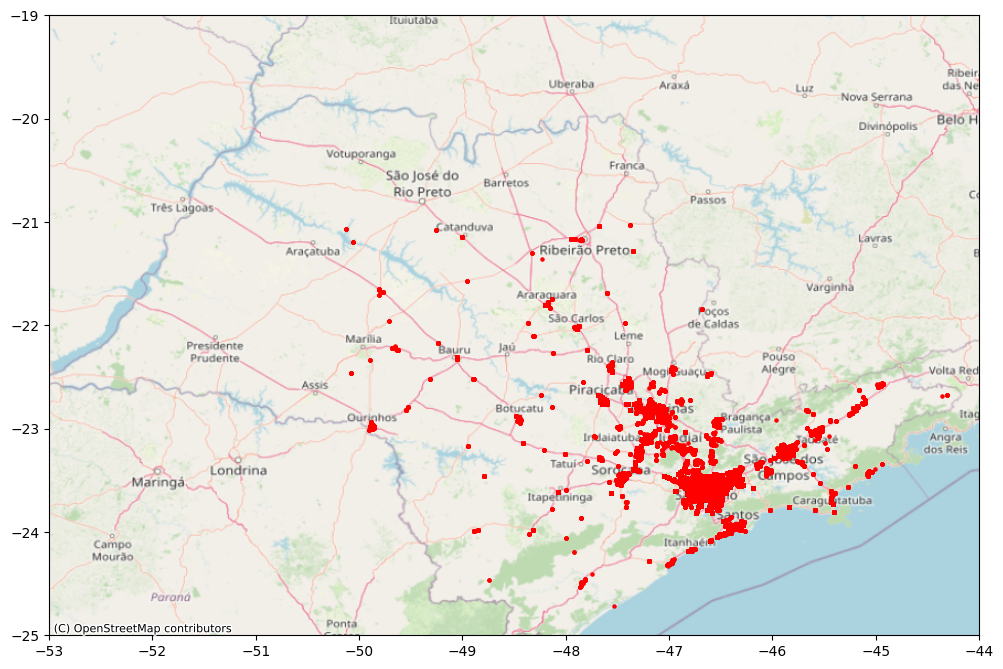

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, box
import contextily as ctx  # Biblioteca para adicionar mapas de fundo

def create_grid(sp_bounds, grid_size, overlap_percent=0):
    overlap = grid_size * overlap_percent / 100
    x_min, x_max = sp_bounds["minx"], sp_bounds["maxx"]
    y_min, y_max = sp_bounds["miny"], sp_bounds["maxy"]
    
    grid_cells = []
    
    x = x_min
    while x < x_max:
        y = y_min
        while y < y_max:
            grid_cells.append(box(x, y, min(x + grid_size, x_max), min(y + grid_size, y_max)))
            y += grid_size - overlap
        x += grid_size - overlap
    
    return gpd.GeoDataFrame(grid_cells, columns=['geometry'])

# Definir os limites do ESTADO de São Paulo (aproximadamente)
sp_bounds = {
    "minx": -53.0,
    "miny": -25.0,
    "maxx": -44.0,
    "maxy": -19.0
}

# Criar a grid com a sobreposição definida
grid = create_grid(sp_bounds, grid_size, overlap_percent)

# Definir o sistema de coordenadas para o GeoDataFrame da grid
grid = grid.set_crs(epsg=4326)  # Sistema de coordenadas WGS84 (Latitude/Longitude)

# Plotar o GeoDataFrame com um mapa de fundo
fig, ax = plt.subplots(figsize=(12, 20))

# Plotar a grid
grid.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=0, alpha=0.3)  # Definir transparência com alpha (menor alpha, mais transparente)

# Adicionar o mapa de fundo
ctx.add_basemap(ax, crs=grid.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=1.0)
#ctx.add_basemap(ax, crs=grid.crs.to_string(), source=ctx.providers.OpenTopoMap, alpha=1.0)

#==================
# Definir o sistema de coordenadas (se ainda não estiver definido)
gdf = gdf.set_crs(epsg=4326)

# Plotar os pontos
#gdf.plot(ax=ax, marker='o', color='red', markersize=5)#, figsize=(10, 8))
df_all.plot(ax=ax, marker='o', color='red', markersize=5)

#================

# Limitar o plot aos limites especificados
ax.set_xlim(sp_bounds["minx"], sp_bounds["maxx"])
ax.set_ylim(sp_bounds["miny"], sp_bounds["maxy"])

plt.show()
#### O plot dos radares só funciona ao usar o WGS84!

In [71]:
##########

In [72]:
# Liberando Memória
import gc
df_alertas=[]
df_locais=[]
del df_alertas
del df_locais
gc.collect(generation=2)

54

#### Colocando em ordem cronológica por veículo

In [73]:

df_all['DataHora'] = pd.to_datetime(df_all['DataHora'])
df_all = df_all.sort_values(by=['EmpID', 'DataHora'])
#display(df_all)


In [74]:
len(df_all.groupby('EmpID'))

68786

# 4.5. APLICANDO FILTROS NOS DADOS

In [75]:
print(len(df_all))
# Identificar os EmpIDs onde AleAleTipID é 5 (CLONADO)
empids_to_remove = df_all[df_all['AleAleTipID'] == 5]['EmpID'].unique()
print("Quantidade de EmpID clonados que serão retirados do estudo:")
print(len(empids_to_remove))

# Remover todas as linhas com os EmpIDs identificados como CLONADO
df_all = df_all[~df_all['EmpID'].isin(empids_to_remove)]
print(len(df_all))

288656
Quantidade de EmpID clonados que serão retirados do estudo:
0
288656


## 4.5.1. Separando as sequencias de EmpID por Dia e criando novos EmpIDs para cada dia

In [76]:
# Converter DataHora para apenas data (se ainda não estiver)
df_all['Date'] = df_all['DataHora'].dt.date

# Agrupar por EmpID e Date e identificar mudanças de grupo
df_all['GroupChange'] = df_all.groupby('EmpID')['Date'].diff().ne(pd.Timedelta(days=0)).cumsum()

# Multiplicar o número da mudança por 1*10^10 e adicionar ao EmpID original
df_all['EmpID'] = df_all['EmpID'] + df_all['GroupChange'] * 10**10

In [77]:
len(df_all.groupby('EmpID'))

153169

In [78]:
len(df_all)

288656

## 4.5.3. Criando Cálculo da Diferença de "Horário" e Filtrando Por "Faixa de Tempo"

In [79]:
#df_all['DataHora'] = pd.to_datetime(df_all['DataHora'])
#df_all['Diff_Time'] = df_all.groupby('EmpID')['DataHora'].diff().fillna(pd.Timedelta(seconds=0))
print(len(df_all))
change = 0
while change != len(df_all):

    change = len(df_all)
    df_all = df_all.sort_values(by=['EmpID', 'DataHora'])
    
    # Criar uma nova coluna 'Diff' que calcula a diferença de tempo
    df_all['Diff_Time'] = df_all.groupby('EmpID')['DataHora'].diff().fillna(pd.Timedelta(seconds=1))
    #display(df_all[['EmpID','Diff_Time','DataHora']])
    
    # Mostrar o DataFrame resultante
    #df_filtered = df_all[df_all['Diff_Time'] > pd.Timedelta(seconds=0.1)]
    #df_filtered = df_all[df_all['Diff_Time'] < pd.Timedelta(seconds=(86400/32))]  # /96 = 15 min; /48 = 30 min; /32 = 45 min ; /24 = 1h; /12 = 2h; /6 = 4h; /4 = 6h; /3 = 8h;
    #df_filtered = df_all
    #df_filtered = df_filtered[['EmpID', 'DataHora', 'Diff_Time']]
    
    #df_all = df_filtered

#df_filtered = df_all[df_all['Diff_Time'] >= pd.Timedelta(seconds=1)]
#df_all = df_filtered
print("Retirados registros onde o veículo teria passado em 2 radares ao mesmo tempo.")
print(len(df_all))
#display(df_all.sort_values(by='Diff_Time')[['EmpID', 'DataHora','Diff_Time']])
#display(df_filtered.sort_values(by='Diff_Time')[['EmpID', 'DataHora','Diff_Time']])

288656
Retirados registros onde o veículo teria passado em 2 radares ao mesmo tempo.
288656


## 4.5.5. Criando Cálculo da "Velocidade Média" entre os pontos

In [80]:
# Função para calcular distância euclidiana
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

change = 0
while change != len(df_all):

    change = len(df_all)
    df_all = df_all.sort_values(by=['EmpID', 'DataHora'])
    
    # Preparar as colunas de shift para latitude e longitude
    df_all['Prev_LocLat'] = df_all.groupby('EmpID')['LocLat'].shift(1)
    df_all['Prev_LocLong'] = df_all.groupby('EmpID')['LocLong'].shift(1)
    
    df_all = df_all.sort_values(by=['EmpID', 'DataHora'])
    
    # Aplicar a função de distância
    df_all['Diff_Distance'] = euclidean_distance(df_all['Prev_LocLong'], df_all['Prev_LocLat'], df_all['LocLong'], df_all['LocLat'])
    df_all['Diff_Distance'] = df_all['Diff_Distance'].fillna(0)  # Substituir NaN por 0 para a primeira entrada de cada EmpID
    
    #df_filtered = df_all[df_all['Diff_Distance'] < 0.27]  # 200 km = 1.8 para 1h ou 150 km = 1.35 para 45min
    #df_filtered = df_all[df_all['Diff_Distance'] < 0.045]
    #df_all = df_filtered

#df_filtered = df_all[df_all['Diff_Distance'] > 0.01]
#df_all = df_filtered

#Para 200 km: 1.8°
#Para 150 km: 1.35°
#Para 111 km: 1.0°
#Para 50 km: 0.45°
#Para 30 km: 0.27°
#Para 15 km: 0.14°
#Para 10 km: 0.09°
#Para 5 km: 0.045°
#Para 1 km: 0.009°
#Para 0.1 km (100 metros): 0.0009°
#Para 0.01 km (10 metros): 0.00009°
#df_all.drop(columns=['Prev_LocLong', 'Prev_LocLat'], inplace=True)
# Exibir o DataFrame final
#display(df_all.sort_values(by=['Diff_Distance','EmpID'])[['EmpID', 'DataHora','Diff_Time', 'Diff_Distance']])
#display(df_all.sort_values(by=['EmpID'])[['EmpID', 'DataHora','Diff_Time', 'Diff_Distance']])

In [81]:
# Liberando Memória
#import gc
#df_filtered=[]
#del df_filtered
#gc.collect(generation=2)

In [82]:

change = 0
while change != len(df_all):

    change = len(df_all)
    df_all = df_all.sort_values(by=['EmpID', 'DataHora'])

    # Converter graus para quilômetros (assumindo 111 km/grau)
    df_all['Diff_Distance_km'] = df_all['Diff_Distance'] * 111
    
    # Converter Diff_Time para horas
    df_all['Diff_Time_Hours'] = df_all['Diff_Time'].dt.total_seconds() / 3600  # Converte de segundos para horas
    
    # Calcular a velocidade média em km/h
    #df_all['Average_Speed_kmh'] = df_all['Diff_Distance_km'] / df_all['Diff_Time_Hours']
    # Calcular a velocidade média em km/h somente onde a distância é maior que 0
    df_all['Average_Speed_kmh'] = np.where(
        (df_all['Diff_Distance_km'] > 0) & (df_all['Diff_Time_Hours'] > 0),
        df_all['Diff_Distance_km'] / df_all['Diff_Time_Hours'], 0)  # ou np.nan se preferir
    
    # Substituir NaN por 0 onde a divisão por zero ocorreu
    df_all['Average_Speed_kmh'] = df_all['Average_Speed_kmh'].fillna(0)
    
    # foi analisado em que momento haveria uma distância de mais de 10km/h sem um registro de velocidade média, 
    # dando um indicativo de que a partir dali os valores tenderiam a ser irreais.
    # Entre 230 km/h e 240km/h não houve registro, portanto, assumimos 230 km/h como o teto de uma velocidade possível.
    
    #df_filtered = df_all[df_all['Average_Speed_kmh'] < 200] 
    #df_all = df_filtered
    print(len(df_all))

df_all


288656


,Unnamed: 0_x,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,...,grid_id,Date,GroupChange,Diff_Time,Prev_LocLat,Prev_LocLong,Diff_Distance,Diff_Distance_km,Diff_Time_Hours,Average_Speed_kmh
484458,1206810,10000000868,2022-07-28 13:15:41,27027,2,BIN ROUBO/FURTO,2022.0,2022-07-26 00:00:00,SAO PAULO,1838787,...,37,2022-07-28,1,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
480777,1201282,10000000868,2022-07-28 18:00:56,27027,2,BIN ROUBO/FURTO,2022.0,2022-07-26 00:00:00,SAO PAULO,1838787,...,37,2022-07-28,1,0 days 04:45:15,-23.3960,-46.3345,0.000000,0.000000,4.754167,0.000000
484457,1206809,10000000868,2022-07-28 18:16:04,27028,2,BIN ROUBO/FURTO,2022.0,2022-07-26 00:00:00,SAO PAULO,1838787,...,37,2022-07-28,1,0 days 00:15:08,-23.3960,-46.3345,0.000000,0.000000,0.252222,0.000000
473494,1189812,20000017749,2022-11-19 12:45:22,22960,2,BIN ROUBO/FURTO,2022.0,2022-11-14 00:00:00,ITAPEVI,2639262,...,37,2022-11-19,2,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
587624,1376858,30000018726,2023-06-16 16:56:34,16336,1,SINESP INTEGRACAO,2023.0,2023-05-22 00:00:00,ANAPOLIS,30191165,...,37,2023-06-16,3,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17959,38605,1531650123326791,2024-04-29 00:26:44,58984,1,BIN ROUBO/FURTO,2024.0,2024-04-22 02:42:00,NaN,NaN,...,32,2024-04-29,153165,0 days 00:19:55,-22.0179,-47.9133,0.027168,3.015648,0.331944,9.084796
143758,275078,1531660123401142,2024-05-16 21:31:09,43679,1,BIN ROUBO/FURTO,2024.0,2024-05-01 19:29:00,NaN,NaN,...,43,2024-05-16,153166,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
153211,293822,1531670123418223,2024-05-11 02:30:30,25569,1,BIN ROUBO/FURTO,2024.0,2024-04-27 14:02:00,NaN,NaN,...,36,2024-05-11,153167,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
1293820,3504346,1531680123522414,2024-05-18 20:02:45,43633,1,BIN ROUBO/FURTO,2024.0,2024-05-04 16:32:00,NaN,NaN,...,43,2024-05-18,153168,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000


In [83]:
len(df_all[df_all['Average_Speed_kmh'] >= 200])

1452

In [84]:
set(df_all['UFGeoSgl'])

{'SP'}

## 6. Preparando os dados para Criação e Treinamento do modelo

### 6.1. Exclusão de linhas que não possibilitam predição

In [85]:
# Cerca de 37% dos veículos (EmpID) neste momento só possuem uma única passagem por sensores externos (câmeras) o que impossibilita qualquer predição e validação de próximo sensor.
# Assim, vamos excluir os registros de veículos com apenas uma passagem por sensor externo (câmera).

# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_all.shape))

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_all['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com registros unitários
empid_uniques = count_empid[count_empid <= 1].index

# Use a função `isin` para criar um filtro booleano
filtered = df_all['EmpID'].isin(empid_uniques)

# Aplique o filtro para manter apenas as linhas desejadas
df_filtered_0 = df_all[~filtered]

# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_filtered_0.shape))

#display(count_empid)
#display(empid_uniques)
display(df_filtered_0)
#display(df_filtered_0[df_filtered_0['DataHora'] >= df_filtered_0['AleDatOcr'] ].shape)

'Quantidade de registros antes: (288656, 49)'

'Quantidade de registros depois: (182183, 49)'

,Unnamed: 0_x,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,...,grid_id,Date,GroupChange,Diff_Time,Prev_LocLat,Prev_LocLong,Diff_Distance,Diff_Distance_km,Diff_Time_Hours,Average_Speed_kmh
484458,1206810,10000000868,2022-07-28 13:15:41,27027,2,BIN ROUBO/FURTO,2022.0,2022-07-26 00:00:00,SAO PAULO,1838787,...,37,2022-07-28,1,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
480777,1201282,10000000868,2022-07-28 18:00:56,27027,2,BIN ROUBO/FURTO,2022.0,2022-07-26 00:00:00,SAO PAULO,1838787,...,37,2022-07-28,1,0 days 04:45:15,-23.3960,-46.3345,0.000000,0.000000,4.754167,0.000000
484457,1206809,10000000868,2022-07-28 18:16:04,27028,2,BIN ROUBO/FURTO,2022.0,2022-07-26 00:00:00,SAO PAULO,1838787,...,37,2022-07-28,1,0 days 00:15:08,-23.3960,-46.3345,0.000000,0.000000,0.252222,0.000000
477440,1196362,80000034924,2022-04-05 15:17:28,13656,2,BIN ROUBO/FURTO,2022.0,2022-04-01 00:00:00,MAUA,557908,...,37,2022-04-05,8,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
477428,1196350,80000034924,2022-04-05 15:19:44,18692,2,BIN ROUBO/FURTO,2022.0,2022-04-01 00:00:00,MAUA,557908,...,37,2022-04-05,8,0 days 00:02:16,-23.4989,-46.6853,0.013883,1.540982,0.037778,40.790707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351999,665628,1531600123208440,2024-05-23 17:15:16,56560,1,BIN ROUBO/FURTO,2024.0,2024-05-11 08:22:00,NaN,NaN,...,32,2024-05-23,153160,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
351998,665627,1531600123208440,2024-05-23 17:20:37,56605,1,BIN ROUBO/FURTO,2024.0,2024-05-11 08:22:00,NaN,NaN,...,32,2024-05-23,153160,0 days 00:05:21,-22.7615,-47.1448,0.018077,2.006523,0.089167,22.503058
351682,664612,1531600123208440,2024-05-23 17:43:13,56606,1,BIN ROUBO/FURTO,2024.0,2024-05-11 08:22:00,NaN,NaN,...,32,2024-05-23,153160,0 days 00:22:36,-22.7566,-47.1622,0.000000,0.000000,0.376667,0.000000
20118,41940,1531650123326791,2024-04-29 00:06:49,58987,1,BIN ROUBO/FURTO,2024.0,2024-04-22 02:42:00,NaN,NaN,...,32,2024-04-29,153165,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000


In [86]:
#df_filtered_2 = df_filtered_0
# APLICANDO ESSE FILTRA JÁ LÁ EM CIMA
df_filtered_2 = df_filtered_0[df_filtered_0['AleAleTipID'].isin([1, 2, 11, 12])]  # df_filtered_1

# Apenas alertas de veículos Roubados ou Furtados (ROUBADO=1, FURTADO=2, FURTO 190=11, ROUBO 190=12).

# tamanho anterior ao tratamento
display("Quantidade de registros antes: " + str(df_filtered_0.shape))
# tamanho após o tratamento
display("Quantidade de registros depois: " + str(df_filtered_2.shape))

'Quantidade de registros antes: (182183, 49)'

'Quantidade de registros depois: (182183, 49)'

In [87]:
# Liberando Memória
#import gc
df_filtered_0=[]
del df_filtered_0
gc.collect(generation=2)

104

In [88]:
df_filtered_2

,Unnamed: 0_x,EmpID,DataHora,LocID,AleAleTipID,AleSisOcr,AleAnoBO,AleDatOcr,AleMunBO,AleNumBO,...,grid_id,Date,GroupChange,Diff_Time,Prev_LocLat,Prev_LocLong,Diff_Distance,Diff_Distance_km,Diff_Time_Hours,Average_Speed_kmh
484458,1206810,10000000868,2022-07-28 13:15:41,27027,2,BIN ROUBO/FURTO,2022.0,2022-07-26 00:00:00,SAO PAULO,1838787,...,37,2022-07-28,1,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
480777,1201282,10000000868,2022-07-28 18:00:56,27027,2,BIN ROUBO/FURTO,2022.0,2022-07-26 00:00:00,SAO PAULO,1838787,...,37,2022-07-28,1,0 days 04:45:15,-23.3960,-46.3345,0.000000,0.000000,4.754167,0.000000
484457,1206809,10000000868,2022-07-28 18:16:04,27028,2,BIN ROUBO/FURTO,2022.0,2022-07-26 00:00:00,SAO PAULO,1838787,...,37,2022-07-28,1,0 days 00:15:08,-23.3960,-46.3345,0.000000,0.000000,0.252222,0.000000
477440,1196362,80000034924,2022-04-05 15:17:28,13656,2,BIN ROUBO/FURTO,2022.0,2022-04-01 00:00:00,MAUA,557908,...,37,2022-04-05,8,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
477428,1196350,80000034924,2022-04-05 15:19:44,18692,2,BIN ROUBO/FURTO,2022.0,2022-04-01 00:00:00,MAUA,557908,...,37,2022-04-05,8,0 days 00:02:16,-23.4989,-46.6853,0.013883,1.540982,0.037778,40.790707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351999,665628,1531600123208440,2024-05-23 17:15:16,56560,1,BIN ROUBO/FURTO,2024.0,2024-05-11 08:22:00,NaN,NaN,...,32,2024-05-23,153160,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000
351998,665627,1531600123208440,2024-05-23 17:20:37,56605,1,BIN ROUBO/FURTO,2024.0,2024-05-11 08:22:00,NaN,NaN,...,32,2024-05-23,153160,0 days 00:05:21,-22.7615,-47.1448,0.018077,2.006523,0.089167,22.503058
351682,664612,1531600123208440,2024-05-23 17:43:13,56606,1,BIN ROUBO/FURTO,2024.0,2024-05-11 08:22:00,NaN,NaN,...,32,2024-05-23,153160,0 days 00:22:36,-22.7566,-47.1622,0.000000,0.000000,0.376667,0.000000
20118,41940,1531650123326791,2024-04-29 00:06:49,58987,1,BIN ROUBO/FURTO,2024.0,2024-04-22 02:42:00,NaN,NaN,...,32,2024-04-29,153165,0 days 00:00:01,NaN,NaN,0.000000,0.000000,0.000278,0.000000


### 6.4. Filtrando colunas por Features e Targets

In [89]:
#df_features_targets = df_filtered_2[['EmpID','DataHora','AleAleTipID','AleSisOcr','AleDatOcr','AleMunBO','AleUfBo','TempoDoBO',
#                      'LocID','EmpresaID','LocLat','LocLong','LocMunGeoId','Diff_Distance']]
#df_ft_min = df_features_targets[['EmpID','LocLat','LocLong']]  # talvez incluir o 'LocID' e 'DataHora'
#df_ft_min_n_seq = df_filtered_2[['EmpID','LocLat','LocLong','LocID','Diff_Distance','LocMunGeoId']]
df_ft_min_n_seq = df_filtered_2[['EmpID','LocLat','LocLong','LocID','Diff_Distance','LocMunGeoId',
                                'nearest_node', 'nearest_edge_1', 'nearest_edge_2', 'street_type_crossing', 'street_type_mini_roundabout', 'street_type_motorway_junction', 
                                'street_type_traffic_signals', 'street_type_turning_circle', 'street_type_unknown',
                                'geometry', 'grid_id']]
                                #,'LocLat_orig','LocLong_orig']]
display(df_ft_min_n_seq)

,EmpID,LocLat,LocLong,LocID,Diff_Distance,LocMunGeoId,nearest_node,nearest_edge_1,nearest_edge_2,street_type_crossing,street_type_mini_roundabout,street_type_motorway_junction,street_type_traffic_signals,street_type_turning_circle,street_type_unknown,geometry,grid_id
484458,10000000868,-23.3960,-46.3345,27027,0.000000,3048,1671356849,1671356849,5338197716,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.33450 -23.39600),37
480777,10000000868,-23.3960,-46.3345,27027,0.000000,3048,1671356849,1671356849,5338197716,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.33450 -23.39600),37
484457,10000000868,-23.3960,-46.3345,27028,0.000000,3048,1671356849,1671356849,5338197716,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.33450 -23.39600),37
477440,80000034924,-23.4989,-46.6853,13656,0.000000,5542,1438961047,1438961048,1438959819,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.68530 -23.49890),37
477428,80000034924,-23.4857,-46.6810,18692,0.013883,5542,494732433,6334110834,1881947805,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.68100 -23.48570),37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351999,1531600123208440,-22.7615,-47.1448,56560,0.000000,3243,1102331648,1102331648,582557,0.0,0.0,1.0,0.0,0.0,0.0,POINT (-47.14480 -22.76150),32
351998,1531600123208440,-22.7566,-47.1622,56605,0.018077,3243,1102331648,1102331648,582557,0.0,0.0,1.0,0.0,0.0,0.0,POINT (-47.16220 -22.75660),32
351682,1531600123208440,-22.7566,-47.1622,56606,0.000000,3243,1102331648,1102331648,582557,0.0,0.0,1.0,0.0,0.0,0.0,POINT (-47.16220 -22.75660),32
20118,1531650123326791,-22.0179,-47.9133,58987,0.000000,2656,1102331648,1102331648,582557,0.0,0.0,1.0,0.0,0.0,0.0,POINT (-47.91330 -22.01790),32


### 6.5. Preparando as sequências

#### 6.5.1. Excluindo os registros de veículos que não possuem a sequência mínima a ser definida para o treinamento do modelo

- # n_seq

### n_seq = número de sequência histórica
#### **** Valor a ser alterado para variação da quantidade de registros da sequência histórica.

In [90]:
# Como foram aplicados filtros por tipo de alerta e por estado, uma nova limpeza de sequências mínimas se faz necessária, mesmo para n_seq=1.

# n_seq é o tamanho da sequência previsora para predizer o próximo valor (n_seq mínimo = 1) 
n_seq = 8  # OBS: é usado em células posteriores # 2, 10

# tamanho anterior ao tratamento
display(df_ft_min_n_seq.shape)

# Use o método groupby para contar o número de ocorrências de cada EmpID
count_empid = df_ft_min_n_seq['EmpID'].value_counts()

# Crie um conjunto de `EmpID` com os registros indesejados
empid_menor_n_seq = count_empid[count_empid <= n_seq].index

# Use a função `isin` para criar um filtro booleano com os registros indesejados
filtered = df_ft_min_n_seq['EmpID'].isin(empid_menor_n_seq)

# Aplique o filtro para manter apenas as linhas desejadas
df_ft_min_n_seq = df_ft_min_n_seq[~filtered].reset_index()
# Observar que nesta tabela foi resetado o index por questões de tratativas futuras, 
# porém a coluna "index" mantém o index original, caso seja necessário para alguma análise retroativa.

df_ft_min_n_seq = df_ft_min_n_seq.rename(columns={"index": "index_original"})

display(df_ft_min_n_seq)

(182183, 17)

,index_original,EmpID,LocLat,LocLong,LocID,Diff_Distance,LocMunGeoId,nearest_node,nearest_edge_1,nearest_edge_2,street_type_crossing,street_type_mini_roundabout,street_type_motorway_junction,street_type_traffic_signals,street_type_turning_circle,street_type_unknown,geometry,grid_id
0,469707,130000034924,-23.514800,-46.677200,13993,0.000000,5542,2348890814,165155204,158833135,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.67720 -23.51480),37
1,477438,130000034924,-23.518000,-46.651500,18711,0.025898,5542,25777903,64094959,25777903,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.65150 -23.51800),37
2,477437,130000034924,-23.516900,-46.647900,13640,0.003764,5542,2400700125,2350007245,6141137621,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.64790 -23.51690),37
3,472677,130000034924,-23.514900,-46.661300,13684,0.013548,5542,453649034,453649034,1964865071,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.66130 -23.51490),37
4,472676,130000034924,-23.513100,-46.676100,13999,0.014909,5542,1964865191,25785979,2390265651,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.67610 -23.51310),37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42583,110518,1531190122472785,-24.019759,-46.501540,25606,0.073344,5533,5311475027,5311475027,5311475183,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.50154 -24.01976),36
42584,110517,1531190122472785,-23.930700,-46.348200,59054,0.177326,1499,5311475027,5311475027,5311475183,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.34820 -23.93070),37
42585,110498,1531190122472785,-23.992673,-46.404554,25638,0.083764,5533,5311475027,5311475027,5311475183,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.40455 -23.99267),37
42586,110548,1531190122472785,-24.031163,-46.493063,25669,0.096516,5533,5311475027,5311475027,5311475183,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-46.49306 -24.03116),36


### 6.6. Separando (Treino e Teste)

# 1

### 1 = 80% iniciais de treinamento e 20% finais de teste

In [91]:
# Separando (Treino e Teste)
Dados_Treino = 1
separate = True
divisor = 0
while separate:
    df_train = df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID','Diff_Distance','LocMunGeoId','geometry','grid_id']].iloc[:int(0.8 * len(df_ft_min_n_seq) + divisor)].reset_index(drop=True)
    df_test = df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID','Diff_Distance','LocMunGeoId','geometry','grid_id']].iloc[int(0.8 * len(df_ft_min_n_seq)) + divisor:].reset_index(drop=True)
    # Cria uma máscara booleana
    intersection = df_train['EmpID'].isin(df_test['EmpID'])
    # Você pode usar esta máscara para ver quais IDs estão presentes em ambos os DataFrames
    common_empids = df_train[intersection]
    if len(common_empids) > 0:
        divisor += 1
    else: separate = False

# Verificar a proporção dos conjuntos
proporcao_treinamento = len(df_train) / len(df_ft_min_n_seq)
proporcao_teste = len(df_test) / len(df_ft_min_n_seq)
print(f"Proporção Treinamento: {proporcao_treinamento:.2%}, Teste: {proporcao_teste:.2%}")
print(f"Registros de Treinamento: {len(df_train)}, Registros de Teste: {len(df_test)}")

Proporção Treinamento: 80.00%, Teste: 20.00%
Registros de Treinamento: 34071, Registros de Teste: 8517


# 2

### 2 = 20% iniciais de teste e 80% finais de treinamento
#### **** Comentar a célula abaixo (teste/treinamento 20/80) para utilizar a célula acima (treinamento/teste 80/20). (a célula abaixo sobreescreve as veriáveis da célula acima)

In [92]:
# Separando (Treino e Teste)
Dados_Treino = 2
separate = True
divisor = 0
while separate:
    df_test = df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID','Diff_Distance','LocMunGeoId','geometry','grid_id']].iloc[:int(0.2 * len(df_ft_min_n_seq) + divisor)].reset_index(drop=True)
    df_train = df_ft_min_n_seq[['EmpID','LocLat','LocLong','LocID','Diff_Distance','LocMunGeoId','geometry','grid_id']].iloc[int(0.2 * len(df_ft_min_n_seq)) + divisor:].reset_index(drop=True)
    # Cria uma máscara booleana
    intersection = df_train['EmpID'].isin(df_test['EmpID'])
    # Você pode usar esta máscara para ver quais IDs estão presentes em ambos os DataFrames
    common_empids = df_train[intersection]
    if len(common_empids) > 0:
        divisor += 1
    else: separate = False

# Verificar a proporção dos conjuntos
proporcao_treinamento = len(df_train) / len(df_ft_min_n_seq)
proporcao_teste = len(df_test) / len(df_ft_min_n_seq)
print(f"Proporção Treinamento: {proporcao_treinamento:.2%}, Teste: {proporcao_teste:.2%}")
print(f"Registros de Treinamento: {len(df_train)}, Registros de Teste: {len(df_test)}")

Proporção Treinamento: 79.98%, Teste: 20.02%
Registros de Treinamento: 34063, Registros de Teste: 8525


### 6.7. Normalizando os dados

In [93]:
# Normalizar apenas com os dados de treinamento
# depois, normalizar os dados de teste, considerando também apenas os dados de treinamento
minmax = MinMaxScaler(feature_range=(0,1))
minmax_features = MinMaxScaler(feature_range=(0,1))

# Train
minmax.fit(df_filtered_2[['LocLat','LocLong']])  # Target. fazendo para os dados de todo o Estado.
minmax_features.fit(df_filtered_2[['LocLat','LocLong','LocID']])  # Features. fazendo para os dados de todo o estado.


df_ft_min_n_seq_norm = pd.DataFrame(minmax_features.transform(df_train[['LocLat','LocLong','LocID']]))  # para usar mais de 2 features
df_ft_min_n_seq_norm = pd.concat([df_train['EmpID'], df_ft_min_n_seq_norm], axis=1)

#Test
test = pd.DataFrame(minmax_features.transform(df_test[['LocLat','LocLong','LocID']]))
test = pd.concat([df_test['EmpID'], test], axis=1)

df_ft_min_n_seq_norm = df_ft_min_n_seq_norm.rename(columns={0: "LocLat", 1: "LocLong", 2: 'LocID'})
test = test.rename(columns={0: "LocLat", 1: "LocLong", 2: 'LocID'})

In [94]:
test

,EmpID,LocLat,LocLong,LocID
0,130000034924,0.290488,0.593317,0.050175
1,130000034924,0.289575,0.597737,0.148077
2,130000034924,0.289889,0.598356,0.042850
3,130000034924,0.290460,0.596051,0.043763
4,130000034924,0.290973,0.593506,0.050300
...,...,...,...,...
8520,327570057969673,0.261351,0.583239,0.158764
8521,327570057969673,0.270911,0.586885,0.070096
8522,327570057969673,0.273908,0.588605,0.094997
8523,327570057969673,0.276362,0.588828,0.159117


#### 6.8. Remove sequências duplicadas

In [95]:
# Remover linhas duplicadas
df_ft_min_n_seq_norm = df_ft_min_n_seq_norm.drop_duplicates()

#### 6.9. Subdividindo as sequencias pelo tamanho definido em 'n_seq'

#### 6.9.1. Subdividindo Sequências por n_seq - Treinamento

#### 6.9.1.2. Por Chunks
#### Apenas Primeira Sequência / JANELA

In [96]:

%%time
# Treinamento
def divide_chunks(df, chunk_size):
    """
    Divide o DataFrame em chunks mantendo o mesmo EmpID dentro de cada chunk.
    """
    # Agrupar o DataFrame pelo EmpID
    grouped = df.groupby('EmpID')
    
    # Inicializar variáveis
    chunks = []
    current_chunk = []
    current_size = 0
    
    # Iterar sobre os grupos
    for _, group in grouped:
        # Se o grupo atual faz o chunk ultrapassar o chunk_size, iniciar um novo chunk
        if current_size + len(group) > chunk_size:
            chunks.append(pd.concat(current_chunk))
            current_chunk = []
            current_size = 0
        
        # Adicionar o grupo atual ao chunk corrente
        current_chunk.append(group)
        current_size += len(group)
    
    # Adicionar o último chunk se não estiver vazio
    if current_chunk:
        chunks.append(pd.concat(current_chunk))
    
    return chunks

# Defina o tamanho do chunk desejado
chunk_size = 5000  # ou qualquer outro tamanho apropriado

# Dividir o DataFrame em chunks
chunks = divide_chunks(df_ft_min_n_seq_norm, chunk_size)

# Exemplo de processamento dos chunks
features = []
target_1 = []
target_2 = []

for chunk in chunks:
    for i in range(n_seq, len(chunk)):
        # Verifique se os 'EmpID' das últimas n_seq linhas são os mesmos
        if all(chunk['EmpID'].iloc[i-n_seq:i] == chunk['EmpID'].iloc[i]):
            # Se os 'EmpID' são iguais, adicione a sequência
            seq = chunk.iloc[i-n_seq:i, 1:4].values  # Seleciona as colunas LocLat, LocLong, LocID
            features.append(seq)
            target_1.append(chunk.iloc[i, 1])
            target_2.append(chunk.iloc[i, 2])

# Converter as listas finais para arrays
features = np.array(features)
target_1 = np.array(target_1)
target_2 = np.array(target_2)
target = np.column_stack((target_1, target_2))

# Agora, features e target contêm os dados preparados.


CPU times: total: 2.8 s
Wall time: 2.89 s


In [97]:
print(len(features))
#ultimo_igual

10083


In [98]:
print(features.shape)
print(target.shape)

(10083, 8, 3)
(10083, 2)


In [99]:
# Liberando Memória
#import gc
target_1=[]
target_2=[]
del target_1
del target_2
gc.collect(generation=2)

0

In [100]:
# Liberando Memória
#import gc
df_ft_min_n_seq_norm=[]
del df_ft_min_n_seq_norm
gc.collect(generation=2)

0

In [101]:
target.shape[1]

2

### 6.9.2. Subdividindo as Sequências por n_seq - Teste

#### 6.9.2.2. Por Chunks
#### Apenas Primeira Sequência / JANELA

In [102]:

%%time
#Test
def divide_chunks(df, chunk_size):
    """
    Divide o DataFrame em chunks mantendo o mesmo EmpID dentro de cada chunk.
    """
    # Agrupar o DataFrame pelo EmpID
    grouped = df.groupby('EmpID')
    
    # Inicializar variáveis
    chunks = []
    current_chunk = []
    current_size = 0
    
    # Iterar sobre os grupos
    for _, group in grouped:
        # Se o grupo atual faz o chunk ultrapassar o chunk_size, iniciar um novo chunk
        if current_size + len(group) > chunk_size:
            chunks.append(pd.concat(current_chunk))
            current_chunk = []
            current_size = 0
        
        # Adicionar o grupo atual ao chunk corrente
        current_chunk.append(group)
        current_size += len(group)
    
    # Adicionar o último chunk se não estiver vazio
    if current_chunk:
        chunks.append(pd.concat(current_chunk))
    
    return chunks

# Defina o tamanho do chunk desejado
chunk_size = 5000  # ou qualquer outro tamanho apropriado

# Dividir o DataFrame de teste em chunks
test_chunks = divide_chunks(test, chunk_size)

# Processamento dos chunks para o conjunto de teste
test_features = []
test_target_1 = []
test_target_2 = []

for chunk in test_chunks:
    for i in range(n_seq, len(chunk)):
        # Verifique se os 'EmpID' das últimas n_seq linhas são os mesmos
        if all(chunk['EmpID'].iloc[i-n_seq:i] == chunk['EmpID'].iloc[i]):
            # Se os 'EmpID' são iguais, adicione a sequência
            test_seq = chunk.iloc[i-n_seq:i, 1:4].values  # Seleciona as colunas LocLat, LocLong, LocID
            test_features.append(test_seq)
            test_target_1.append(chunk.iloc[i, 1])
            test_target_2.append(chunk.iloc[i, 2])

# Converter as listas finais para arrays
test_features = np.array(test_features)
test_target_1 = np.array(test_target_1)
test_target_2 = np.array(test_target_2)
test_target = np.column_stack((test_target_1, test_target_2))

# Agora, test_features e test_target contêm os dados preparados para o conjunto de teste.


CPU times: total: 859 ms
Wall time: 868 ms


In [103]:
print(test_features.shape)

(3405, 8, 3)


In [104]:
test_target.shape

(3405, 2)

In [105]:
# Liberando Memória
#import gc
test_target_1=[]
test_target_2=[]
del test_target_1
del test_target_2
gc.collect(generation=2)

0

In [106]:
# Treinamento
X_treinamento = features
y_treinamento = target

# Teste
X_teste = test_features
y_teste = test_target

In [107]:
print(X_treinamento.shape)
print(y_treinamento.shape)
print(X_teste.shape)
print(y_teste.shape)

(10083, 8, 3)
(10083, 2)
(3405, 8, 3)
(3405, 2)


In [108]:
X_treinamento[0:5,:,:]

array([[[0.2922291 , 0.57857806, 0.07140337],
        [0.29230844, 0.57856241, 0.27171049],
        [0.28087098, 0.56880456, 0.15307838],
        [0.28087098, 0.56880456, 0.27158598],
        [0.28087098, 0.56880456, 0.07138262],
        [0.28087098, 0.56880456, 0.27160673],
        [0.28769156, 0.5701338 , 0.24932041],
        [0.28880454, 0.58079662, 0.07748335]],

       [[0.28911846, 0.5853885 , 0.11541574],
        [0.29209954, 0.57857565, 0.27083895],
        [0.29230844, 0.57856241, 0.27171049],
        [0.29230844, 0.57856241, 0.27173124],
        [0.28880454, 0.58079662, 0.15276711],
        [0.2887937 , 0.5807887 , 0.27058994],
        [0.28880454, 0.58079662, 0.07748335],
        [0.2887937 , 0.5807887 , 0.27052769]],

       [[0.3042436 , 0.58067623, 0.57521114],
        [0.26637368, 0.5917174 , 0.15915835],
        [0.26215005, 0.59651567, 0.1726671 ],
        [0.26822865, 0.59842466, 0.13639476],
        [0.2689421 , 0.59268049, 0.08958104],
        [0.27407894, 0.5893612

In [109]:
print(len(X_teste[:,:]))

3405


In [110]:
y_treinamento

array([[0.2887937 , 0.5807887 ],
       [0.28911846, 0.5853885 ],
       [0.28957507, 0.59773673],
       ...,
       [0.1541129 , 0.64020672],
       [0.14312862, 0.62498487],
       [0.12811221, 0.60598528]])

## 7. Criação e treinamento do modelo 

In [111]:
%%time
#from tensorflow.keras import layers#, regularizers
# Estrutura padrão Artigo (Multi-Step Ballistic Vehicle Trajectory Forecasting Using Deep Learning Models)

regressor = Sequential()
regressor.add(Input(shape=(features.shape[1], features.shape[2])))  # ajuste para novas melhores práticas
regressor.add(LSTM(units = 512, activation = 'linear', kernel_initializer=glorot_uniform(), return_sequences=True))  #, input_shape=(features.shape[1],features.shape[2])))
regressor.add(LSTM(units = 512, activation = 'linear', kernel_initializer=glorot_uniform()))
#regressor.add(Activation('linear'))
regressor.add(Dense(units = 512, activation = 'linear', kernel_initializer=glorot_uniform()))
regressor.add(Activation('gelu'))
regressor.add(Dropout(0.1))
regressor.add(Dense(units = target.shape[1], activation = 'linear', kernel_initializer=glorot_uniform()))

# C:\Users\gusta\.conda\envs\python-3_11_7_new_run_GPU\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:
# Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 
# as the first layer in the model instead.

CPU times: total: 312 ms
Wall time: 239 ms


In [112]:
# Otimizador padrão Artigo (Multi-Step Ballistic Vehicle Trajectory Forecasting Using Deep Learning Models)
tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.98,
    epsilon=1e-08,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    #jit_compile=True,
    name="AdamW"#,
    #**kwargs
)

optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4) #, clipnorm=6.0)  # clipvalue=6.0 # clipnorm=6.0

In [113]:
#from keras import backend as K
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [114]:
# Compilação
#optimizer = 'adam'
regressor.compile(optimizer = optimizer, loss = root_mean_squared_error, 
                  metrics = ['mean_squared_error','mean_absolute_error','accuracy'])  

In [115]:
# Callbacks
es = EarlyStopping(monitor = 'loss', min_delta = 1e-4, patience = 8, verbose = 1) 
rlr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 4, verbose = 1)


In [116]:
%%time
# Treinamento
history = regressor.fit(X_treinamento, y_treinamento, epochs = 300, batch_size = 32,
              callbacks = [es, rlr])

Epoch 1/300
316/316 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9848 - loss: 0.0749 - mean_absolute_error: 0.0634 - mean_squared_error: 0.0160 - learning_rate: 0.0010
Epoch 2/300
316/316 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9957 - loss: 0.0242 - mean_absolute_error: 0.0171 - mean_squared_error: 6.4806e-04 - learning_rate: 0.0010
Epoch 3/300
316/316 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9961 - loss: 0.0215 - mean_absolute_error: 0.0147 - mean_squared_error: 5.2521e-04 - learning_rate: 0.0010
Epoch 4/300
316/316 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9977 - loss: 0.0186 - mean_absolute_error: 0.0129 - mean_squared_error: 3.8799e-04 - learning_rate: 0.0010
Epoch 5/300
316/316 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9980 - loss: 0.0185 - mean_absolute_error: 0.0131 - mean_squared_error: 3.8561e-04 - learning_rate: 0.0010
Epoch 6/300
316/316 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9977 - loss: 0.0178 - mean_absolute_error: 0.0122 - mean_sq

In [117]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 8, 512)         │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 512)            │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,258,952 (39.13 MB)

 Trainable params: 3,419,650 (13.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,839,302 (26.09 MB)

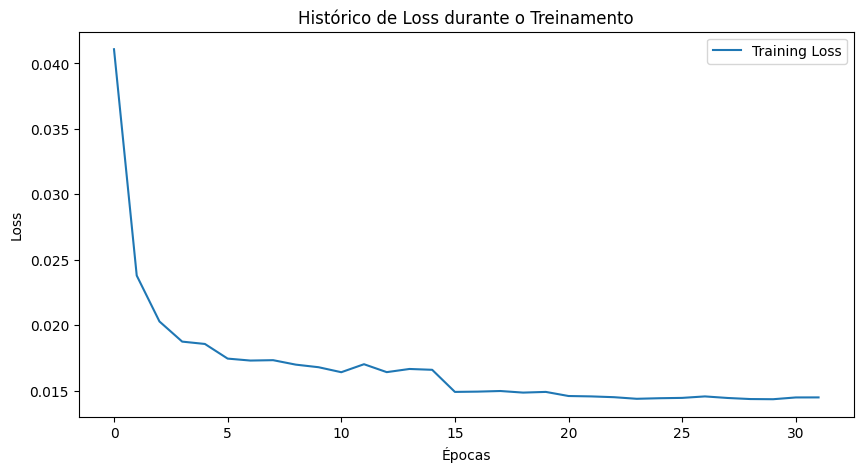

In [118]:
# Acessando os dados de loss de treinamento e validação
loss = history.history['loss']

# Criando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.title('Histórico de Loss durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 8. Realizando previsões

### 8.1. Previsões originais

In [119]:
X_teste.shape

(3405, 8, 3)

In [120]:
%%time
# Avaliar o modelo nos dados de teste
loss_eval = regressor.evaluate(X_teste, y_teste)

# Imprimir a perda
print("Perda nos dados de teste:", loss_eval)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9979 - loss: 0.0183 - mean_absolute_error: 0.0100 - mean_squared_error: 5.6655e-04
Perda nos dados de teste: [0.01526577863842249, 0.00039301440119743347, 0.008475671522319317, 0.9985315799713135]
CPU times: total: 7.23 s
Wall time: 1.35 s


In [121]:
%%time
# Fazer as predições
predicoes = regressor.predict(X_teste)  # input_data
previsoes = minmax.inverse_transform(predicoes)

previsoes = previsoes[:, 0:2]

display(previsoes.shape)
display(previsoes)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


(3405, 2)

array([[-23.501556, -46.681744],
       [-23.501612, -46.67886 ],
       [-23.49196 , -46.676346],
       ...,
       [-23.650885, -46.66292 ],
       [-23.57791 , -46.6993  ],
       [-23.569313, -46.699932]], dtype=float32)

CPU times: total: 9.41 s
Wall time: 1.54 s


### 8.2. Ajustando Previsões originais para pontos possíveis

#### 8.2.1. Pontos possíveis deduplicados

In [122]:
possible_values = np.array(df_ft_min_n_seq[['LocLat','LocLong']].drop_duplicates())
len(possible_values)

1964

#### 8.2.2. Ajustando primeiro Latitude e Longitude de forma separada e depois conjunta

In [123]:
# Ajustando separadamente as latitudes e longitudes dos valores possíveis
closest_latitudes = possible_values[:, 0]
closest_longitudes = possible_values[:, 1]

# Ajuste as latitudes das previsões para valores possíveis
adjusted_latitudes = [min(closest_latitudes, key=lambda x: abs(x - pred[0])) for pred in previsoes]
#print(adjusted_latitudes)

# Ajuste as longitudes das previsões para valores possíveis
adjusted_longitudes = [min(closest_longitudes, key=lambda x: abs(x - pred[1])) for pred in previsoes]
#print(adjusted_longitudes)

# Combine as latitudes e longitudes ajustadas
previsoes_separadas = np.column_stack((adjusted_latitudes, adjusted_longitudes))

#print(previsoes_separadas.shape, previsoes_separadas)

In [124]:
previsoes_separadas

array([[-23.5016, -46.6817],
       [-23.5016, -46.6784],
       [-23.4918, -46.6764],
       ...,
       [-23.6501, -46.6629],
       [-23.5781, -46.6993],
       [-23.5693, -46.7   ]])

In [125]:
# Calcule as distâncias euclidianas entre as previsões e os valores possíveis
distances = cdist(previsoes_separadas, possible_values, metric='euclidean')

# Encontre o índice do valor possível mais próximo para cada previsão
closest_indices = np.argmin(distances, axis=1)

# Obtenha as localizações mais próximas
previsoes_ajustadas_separadas = possible_values[closest_indices]
previsoes_ajustadas = previsoes_ajustadas_separadas  # para compatibilidade com codigo anterior

#print(previsoes_ajustadas.shape, previsoes_ajustadas)

## 10. Resultados

#### 10.2 Analisando Previsões

In [126]:
from sklearn.metrics import r2_score

# Calcular o R^2
r2 = r2_score(y_teste, predicoes)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.8806645431851085


In [127]:
from sklearn.metrics import r2_score

# Calcular o R^2
r2 = r2_score(minmax.inverse_transform(y_teste), minmax.inverse_transform(predicoes))
print(f"R-squared (R2): {r2}")


R-squared (R2): 0.8806645981212133


Para a saída 1:
  R-squared (R2): 0.9296567678690597
  Mean Absolute Error (MAE): 0.008947646649157068
  Mean Squared Error (MSE): 0.00045697091830924224
  Root Mean Squared Error (RMSE): 0.02137687812355308



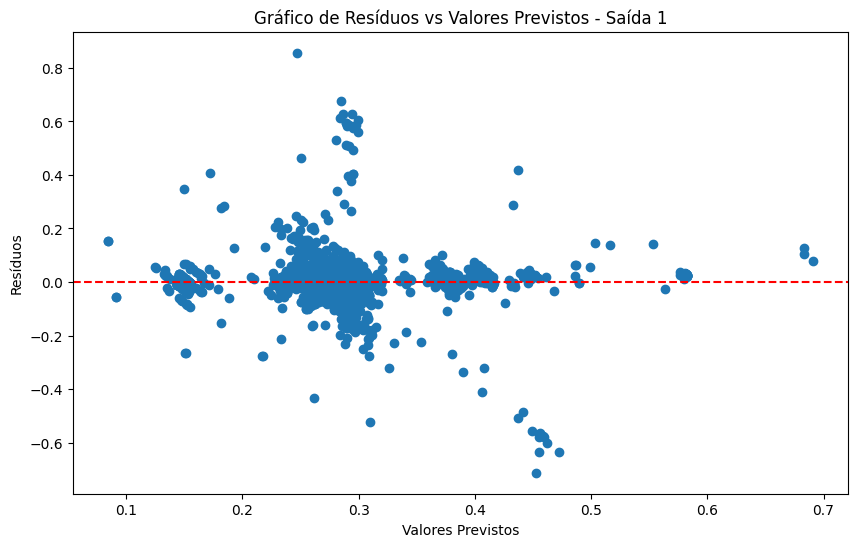

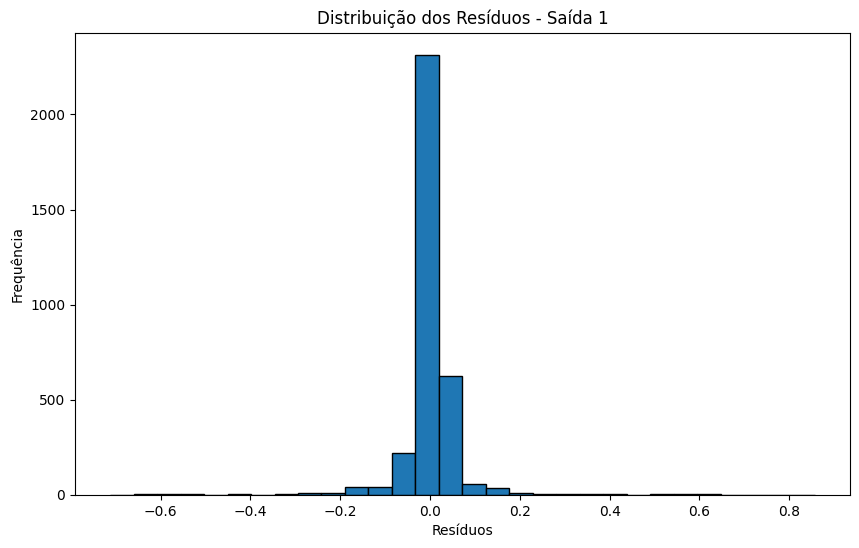

Para a saída 2:
  R-squared (R2): 0.8316723185011576
  Mean Absolute Error (MAE): 0.008003701833999602
  Mean Squared Error (MSE): 0.00032905769939840497
  Root Mean Squared Error (RMSE): 0.018139947612890315



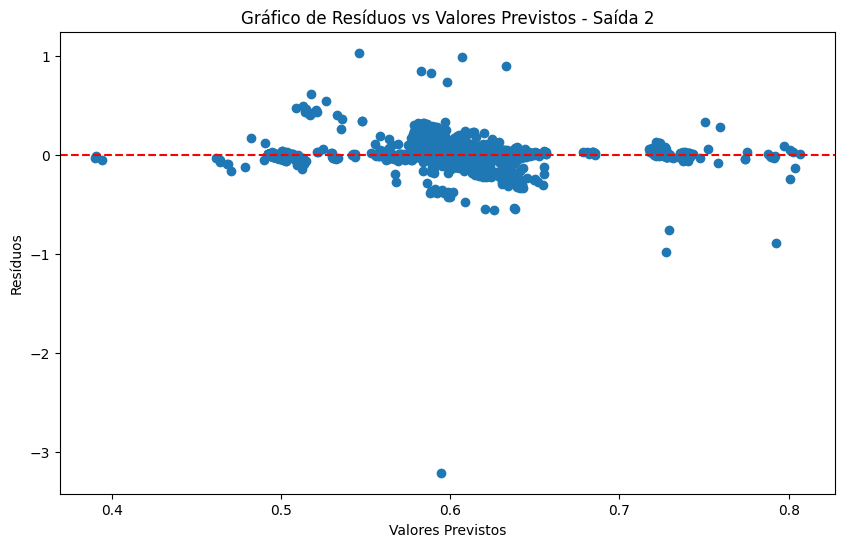

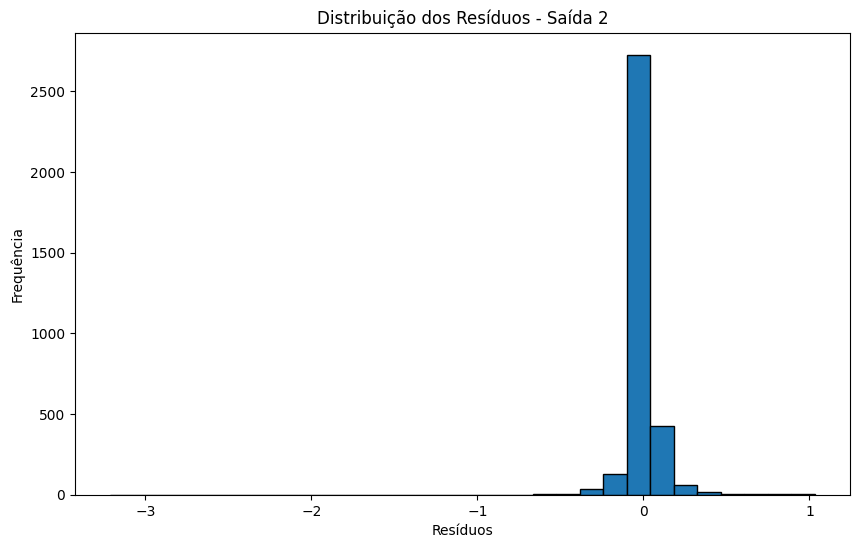

 --- 
Para a Média das saídas 1 e 2:
  R-squared (R2) médio: 0.8806645431851087
  Mean Absolute Error (MAE) médio: 0.008475674241578336
  Mean Squared Error (MSE) médio: 0.0003930143088538236
  Root Mean Squared Error (RMSE) médio: 0.0197584128682217
 --- 


In [128]:
#import numpy as np
#import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# y_teste -> Valores reais do conjunto de teste 
# predicoes -> Valores previstos pelo modelo no conjunto de teste 

# Cálculo dos resíduos para ambas as colunas
residuals = minmax.inverse_transform(y_teste) - minmax.inverse_transform(predicoes)

# Exibir algumas métricas básicas de desempenho do modelo para cada saída
for i in range(y_teste.shape[1]):
    r2 = r2_score(y_teste[:, i], predicoes[:, i])
    mae = mean_absolute_error(y_teste[:, i], predicoes[:, i])
    mse = mean_squared_error(y_teste[:, i], predicoes[:, i])
    rmse = np.sqrt(mse)
    
    print(f"Para a saída {i + 1}:")
    print(f"  R-squared (R2): {r2}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")
    print("")

    if i == 0:
        r2_1 = r2_score(y_teste[:, i], predicoes[:, i])
        mae_1 = mean_absolute_error(y_teste[:, i], predicoes[:, i])
        mse_1 = mean_squared_error(y_teste[:, i], predicoes[:, i])
        rmse_1 = np.sqrt(mse)
        
    if i == 1:
        r2_2 = r2_score(y_teste[:, i], predicoes[:, i])
        mae_2 = mean_absolute_error(y_teste[:, i], predicoes[:, i])
        mse_2 = mean_squared_error(y_teste[:, i], predicoes[:, i])
        rmse_2 = np.sqrt(mse)

    # Gráfico de resíduos vs valores previstos para cada saída
    plt.figure(figsize=(10, 6))
    plt.scatter(predicoes[:, i], residuals[:, i])
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Resíduos')
    plt.title(f'Gráfico de Resíduos vs Valores Previstos - Saída {i + 1}')
    plt.show()

    # Histograma dos resíduos para cada saída
    plt.figure(figsize=(10, 6))
    plt.hist(residuals[:, i], bins=30, edgecolor='black')
    plt.xlabel('Resíduos')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição dos Resíduos - Saída {i + 1}')
    plt.show()

print(" --- ")
print(f"Para a Média das saídas 1 e 2:")
print(f"  R-squared (R2) médio: {(r2_1 + r2_2)/2}")
print(f"  Mean Absolute Error (MAE) médio: {(mae_1 + mae_2)/2}")
print(f"  Mean Squared Error (MSE) médio: {(mse_1 + mse_2)/2}")
print(f"  Root Mean Squared Error (RMSE) médio: {(rmse_1 + rmse_2)/2}")
print(" --- ")

# Fim.